In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.anaconda', '.bash_history', '.cache', '.conda', '.condarc', '.continuum', '.deepface', '.dist', '.equo', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.knime', '.lesshst', '.matplotlib', '.packettracer', '.spyder-py3', '.streamlit', '.vscode', 'ad1 project.ipynb', 'already_random_forest_model.pkl', 'anaconda3', 'AppData', 'Application Data', 'c', 'calculator-app', 'changes_xgb_model.joblib', 'Cisco Packet Tracer 8.2.2', 'Code.ipynb', 'column_transformer.pkl', 'confusion_matrix.png', 'Contacts', 'Cookies', 'countvectorizer.pkl', 'demo', 'Documents', 'Downloads', 'emotion_detector.ipynb', 'Favorites', 'features_job_model_lightgbm.pkl', 'features_tfidf_vectorizer.pkl', 'features_vectorizer.pkl', 'features_xgb_model.pkl', 'file.ubj', 'flagged', 'heart_disease_prediction', 'hii.bin', 'IntelGraphicsProfiles', 'Job Legitimacy Prediction.ipynb', 'job.pkl', 'job_fraud_detection_model.pkl', 'job_model_lightgbm.pkl', 'knime-workspace', 'label_fake.pkl', 'lightgbm_model

In [3]:
dataset = pd.read_csv(r"C:\Users\91897\heart_disease_prediction\heart.csv")

In [5]:
type(dataset)

pandas.core.frame.DataFrame

In [7]:
dataset.shape

(303, 14)

In [9]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
133,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
113,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3,0


In [13]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [19]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [21]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [23]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [25]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

target
1    165
0    138
Name: count, dtype: int64


In [26]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))



Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [27]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

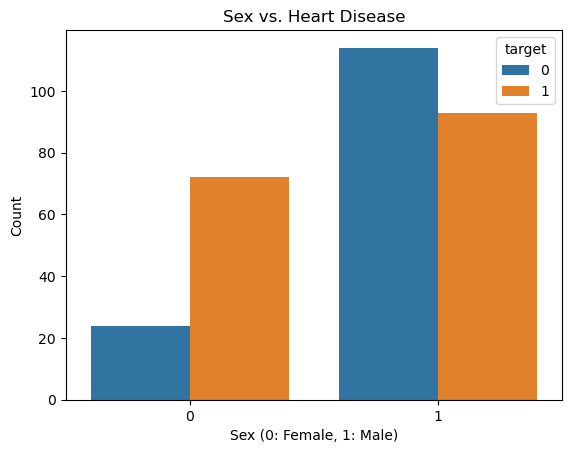

In [37]:
sns.countplot(x='sex', hue='target', data=dataset)
plt.title('Sex vs. Heart Disease')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

In [39]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

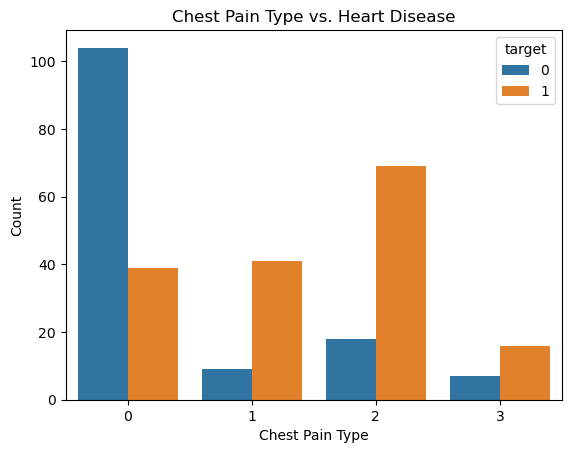

In [41]:
sns.countplot(x='cp', hue='target', data=dataset)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()


In [43]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

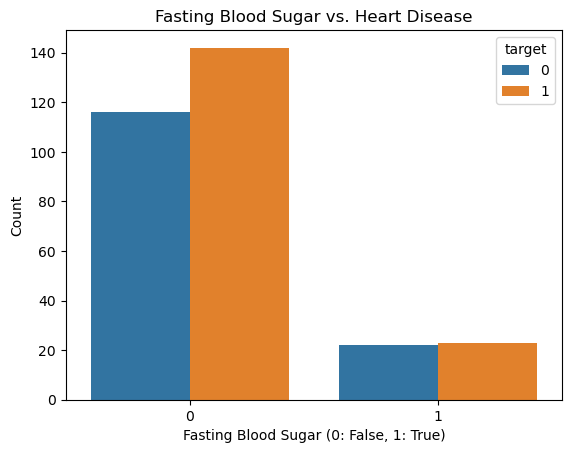

In [45]:
sns.countplot(x='fbs', hue='target', data=dataset)
plt.title('Fasting Blood Sugar vs. Heart Disease')
plt.xlabel('Fasting Blood Sugar (0: False, 1: True)')
plt.ylabel('Count')
plt.show()


In [47]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

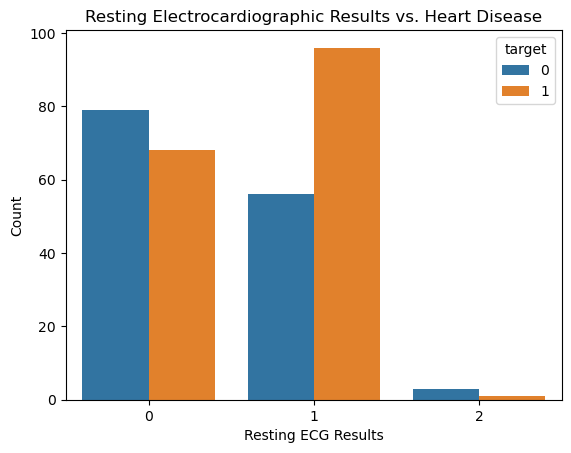

In [49]:
sns.countplot(x='restecg', hue='target', data=dataset)
plt.title('Resting Electrocardiographic Results vs. Heart Disease')
plt.xlabel('Resting ECG Results')
plt.ylabel('Count')
plt.show()


In [51]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

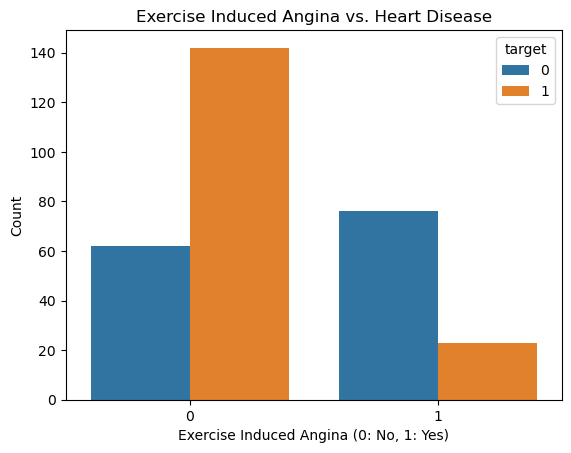

In [53]:
sns.countplot(x='exang', hue='target', data=dataset)
plt.title('Exercise Induced Angina vs. Heart Disease')
plt.xlabel('Exercise Induced Angina (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [55]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

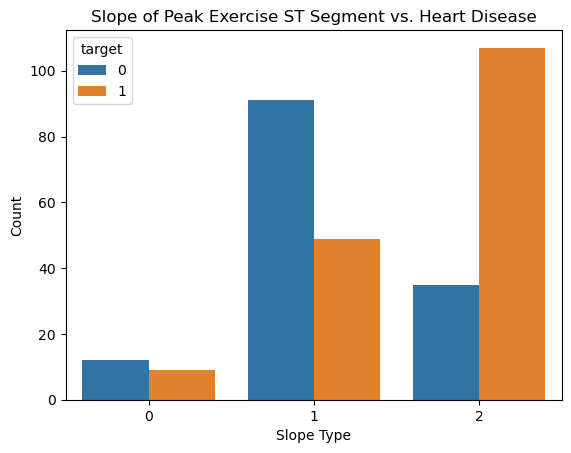

In [57]:
sns.countplot(x='slope', hue='target', data=dataset)
plt.title('Slope of Peak Exercise ST Segment vs. Heart Disease')
plt.xlabel('Slope Type')
plt.ylabel('Count')
plt.show()



In [59]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

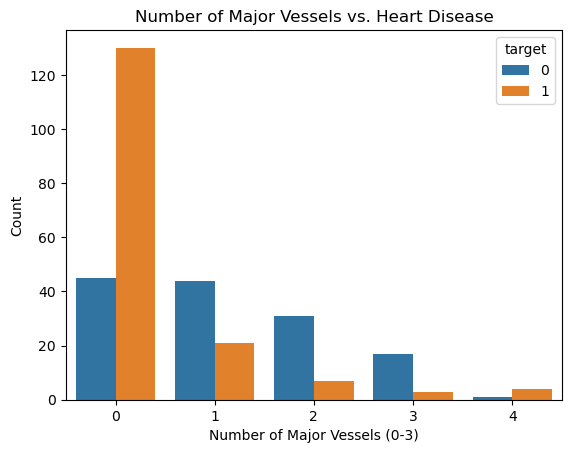

In [61]:
sns.countplot(x='ca', hue='target', data=dataset)
plt.title('Number of Major Vessels vs. Heart Disease')
plt.xlabel('Number of Major Vessels (0-3)')
plt.ylabel('Count')
plt.show()



In [63]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

sns.countplot(x='thal', hue='target', data=dataset)
plt.title('Thalassemia vs. Heart Disease')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.show()


In [66]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [68]:
X_train.shape

(242, 13)

In [70]:
X_test.shape

(61, 13)

In [72]:
Y_train.shape

(242,)

In [74]:
Y_test.shape

(61,)

In [76]:
pip install scikit-learn==1.5.1


Note: you may need to restart the kernel to use updated packages.


# Random forest Algorithm

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [85]:
Y_pred_rf.shape

(61,)

In [95]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 90.16 %


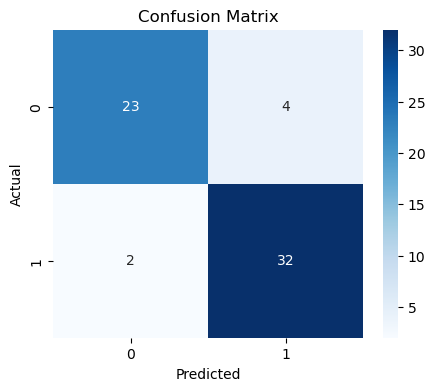

In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score,  precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [99]:
precision = precision_score(Y_test, Y_pred_rf)
recall = recall_score(Y_test, Y_pred_rf)
f1 = f1_score(Y_test, Y_pred_rf)
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Precision: 0.89
Recall: 0.94
F1 Score: 0.91


In [ ]:
import joblib

# Assuming your Random Forest model is stored in a variable named 'rf'
joblib.dump(rf, 'random_forest_model_1.pkl')
